In [439]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
import seaborn as sns
import numpy as np
%matplotlib inline


from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

np.random.seed(0)

In [366]:
red_df= pd.read_csv("Wine_Red_Project.csv")
red_df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.4,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.4,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,7.4,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [367]:
white_df= pd.read_csv("Wine_White_Project.csv")
white_df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [368]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         1599 non-null   float64
 1   Volatile Acidity      1599 non-null   float64
 2   Citric Acid           1599 non-null   float64
 3   Residual Sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free Sulfur Dioxide   1599 non-null   float64
 6   Total Sulfur Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [369]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<AxesSubplot:>

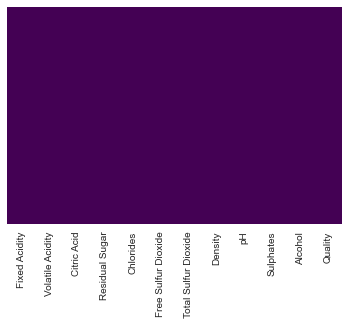

In [370]:
sns.heatmap(red_df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

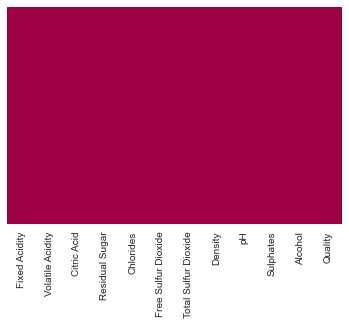

In [371]:
sns.heatmap(white_df.isnull(),yticklabels=False, cbar=False, cmap='Spectral')

In [372]:
red_df.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

In [373]:
white_df.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

In [374]:
#For Red Wine descriptive statistics for all he variables
red_df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.315260,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.733973,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [375]:
#For White Wine descriptive statistics for all he variables
white_df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230620,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


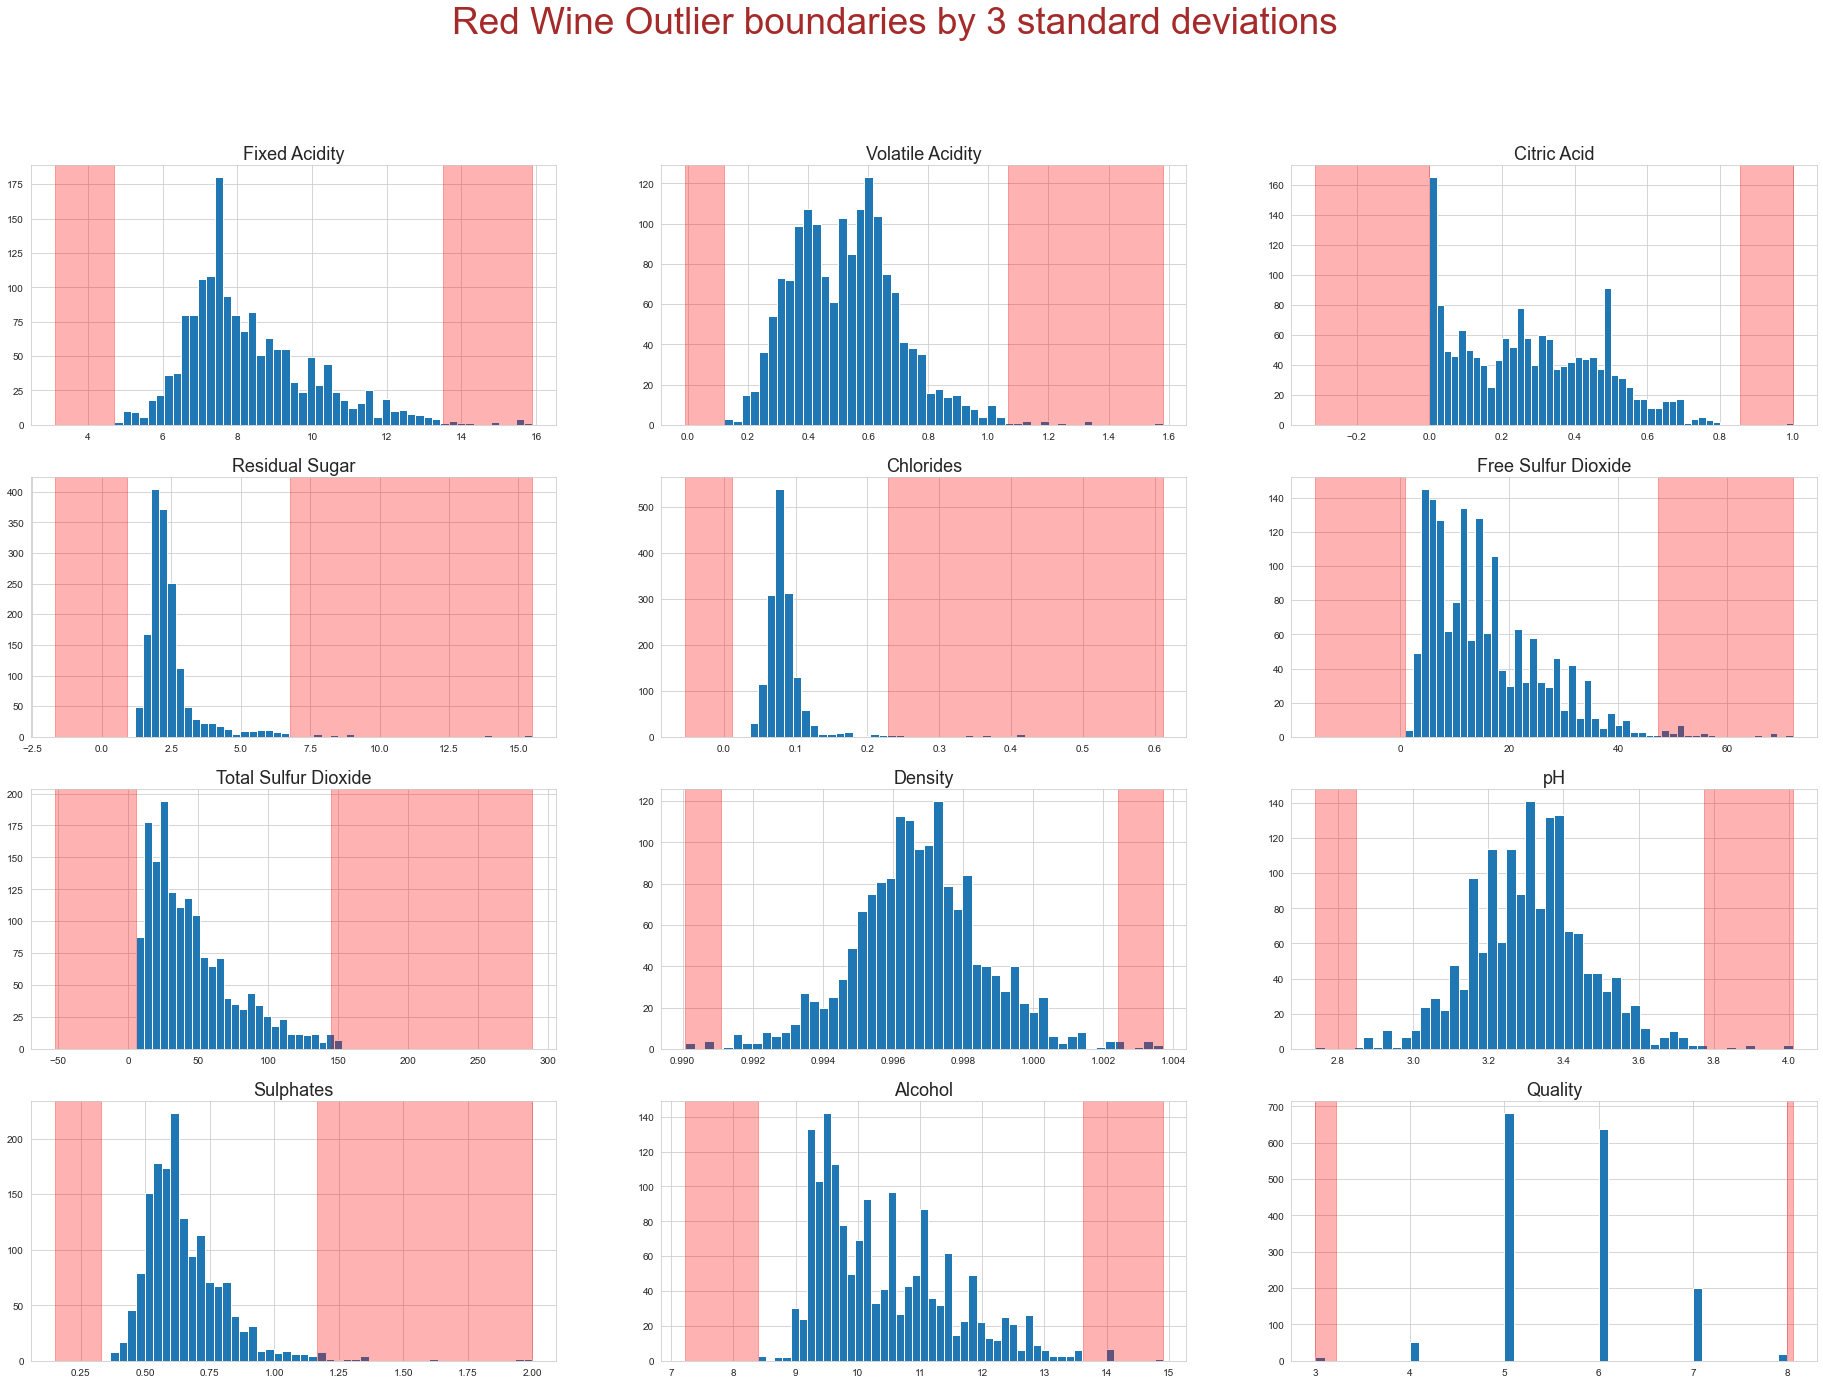

In [376]:
#For Red Wine Outliers
plt.figure(figsize=(32,22))
plt.suptitle('Red Wine Outlier boundaries by 3 standard deviations',fontsize=37, color="Brown")
for i in range(1,red_df.shape[1]+1):
    feature = red_df.iloc[:,i-1]
    mean = feature.mean()
    std_3 = feature.std()*3
    lower, upper = mean-std_3,mean+std_3
    plt.subplot(4,3,i)
    plt.hist(red_df.iloc[:,i-1],bins=50)
    plt.title(red_df.columns[i-1],fontsize=18)
    plt.axvspan(feature.min(),lower,color='red',alpha=0.3)
    plt.axvspan(upper,feature.max(),color='red',alpha=0.3)

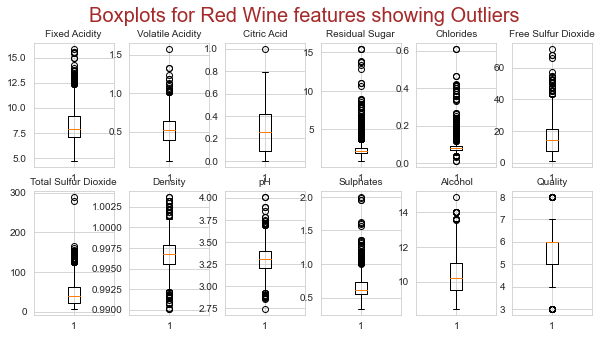

In [377]:
#For Red Wine Outliers
plt.figure(figsize=(10,5))
plt.suptitle('Boxplots for Red Wine features showing Outliers',fontsize=20,color="Brown")
for i in range(1,red_df.shape[1]+1):
    plt.subplot(2,6,i)
    plt.boxplot(red_df.iloc[:,i-1])
    plt.title(red_df.columns[i-1],fontsize=10)

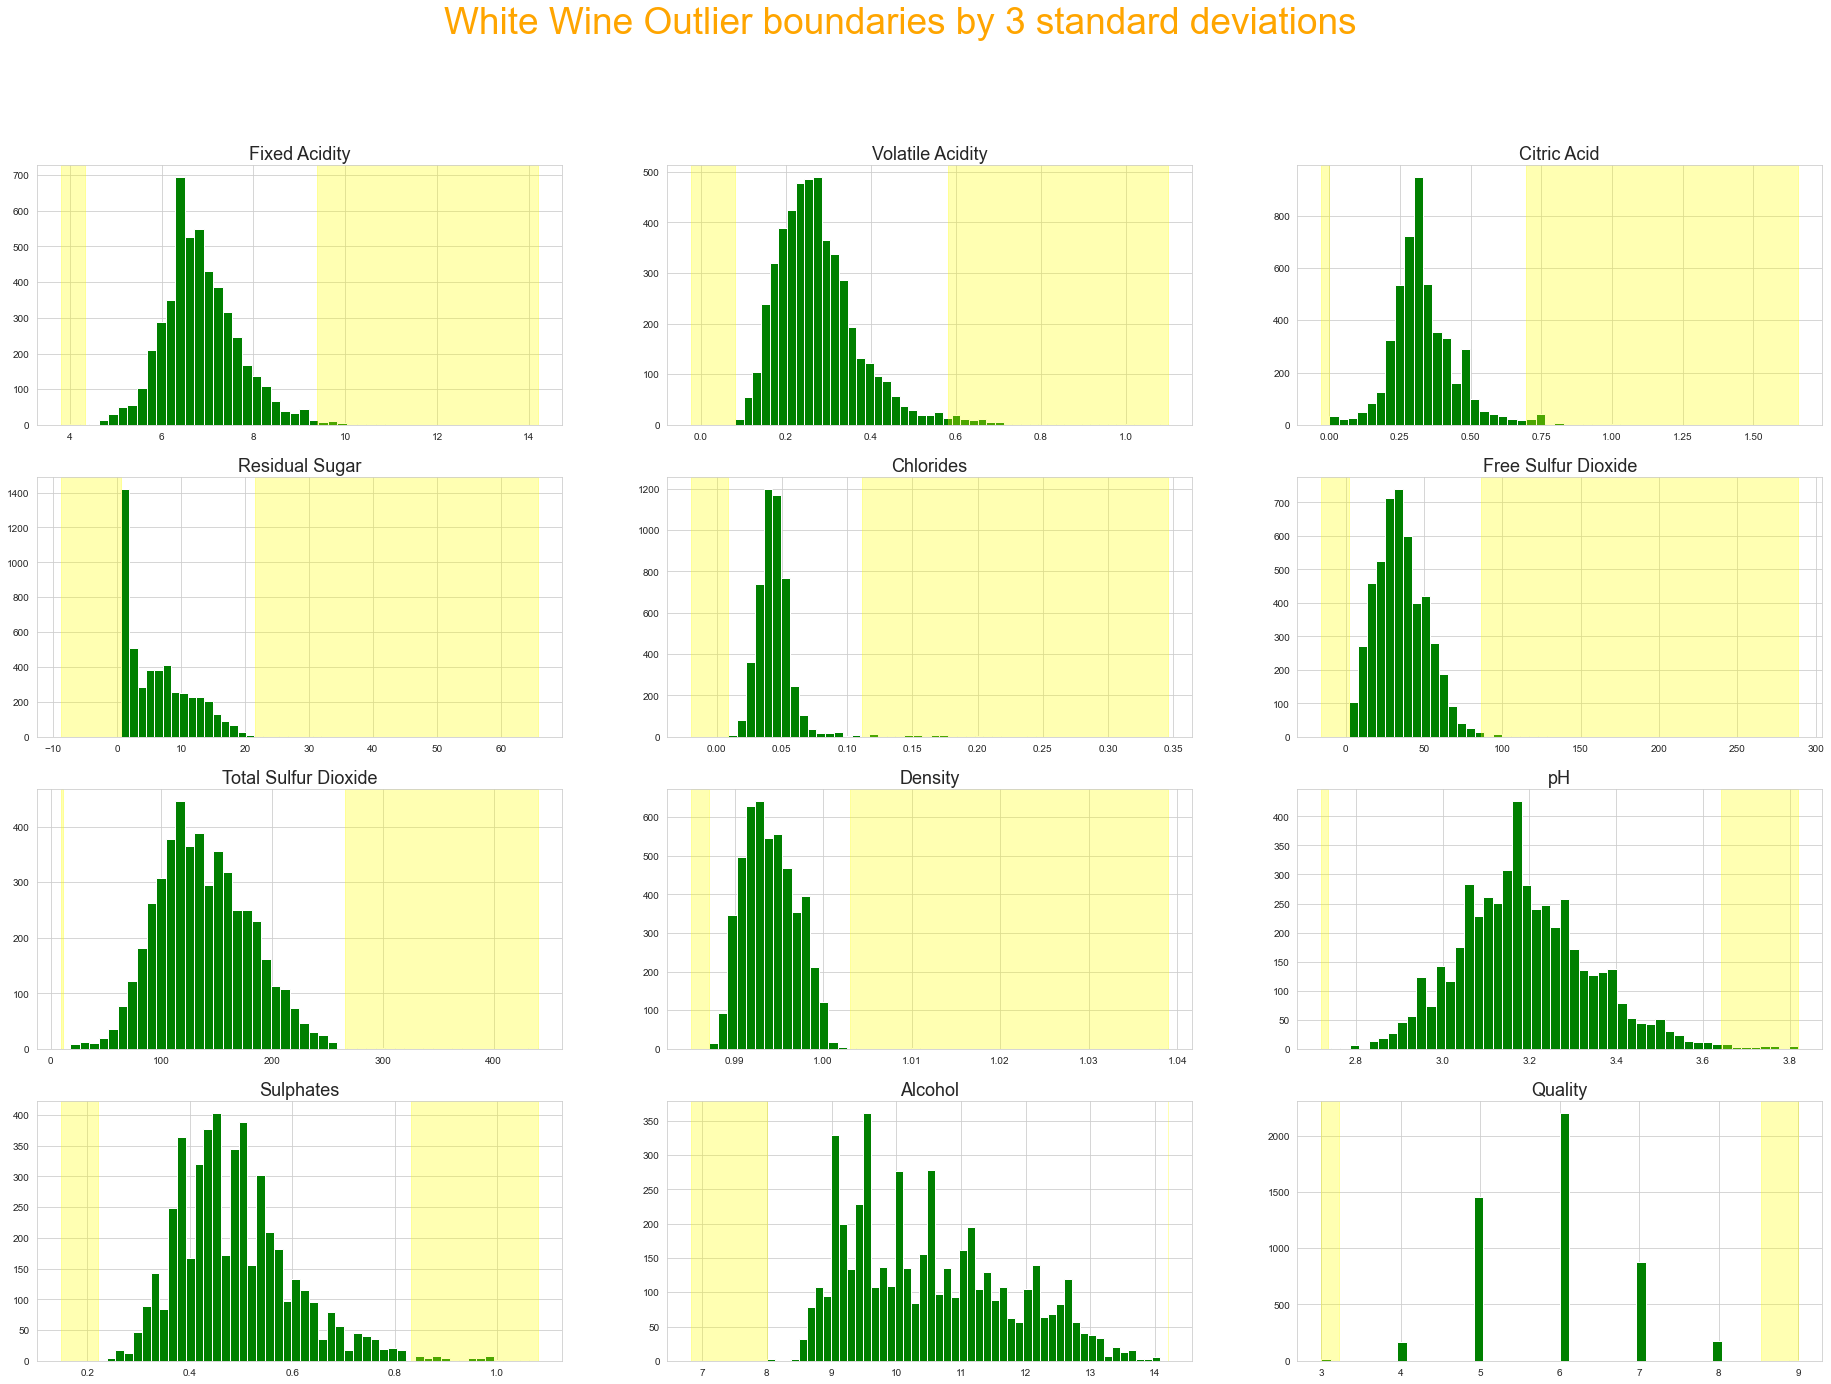

In [378]:
#For White Wine Outliers
plt.figure(figsize=(32,22))
plt.suptitle('White Wine Outlier boundaries by 3 standard deviations',fontsize=37, color="Orange")
for i in range(1,white_df.shape[1]+1):
    feature = white_df.iloc[:,i-1]
    mean = feature.mean()
    std_3 = feature.std()*3
    lower, upper = mean-std_3,mean+std_3
    plt.subplot(4,3,i)
    plt.hist(white_df.iloc[:,i-1],bins=50,color='green')
    plt.title(white_df.columns[i-1],fontsize=18)
    plt.axvspan(feature.min(),lower,color='yellow',alpha=0.3)
    plt.axvspan(upper,feature.max(),color='yellow',alpha=0.3)

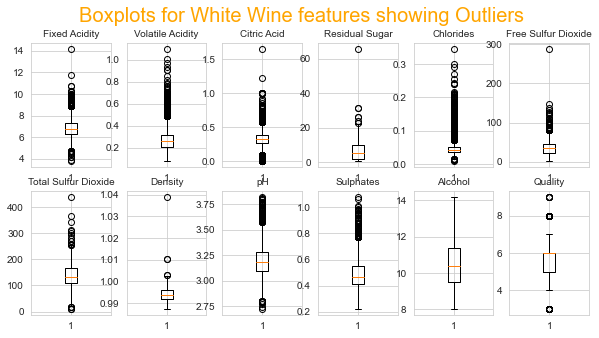

In [379]:
#For White Wine Outliers
plt.figure(figsize=(10,5))
plt.suptitle('Boxplots for White Wine features showing Outliers',fontsize=20, color="Orange")
for i in range(1,white_df.shape[1]+1):
    plt.subplot(2,6,i)
    plt.boxplot(white_df.iloc[:,i-1])
    plt.title(white_df.columns[i-1],fontsize=10)

In [380]:
#For Red Wine Quality Count
red_df['Quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [381]:
red_df['Quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Quality, dtype: int64

In [382]:
red_df['Quality'].count()

1599

<AxesSubplot:xlabel='Quality', ylabel='count'>

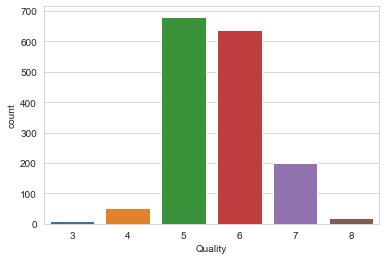

In [383]:
sns.countplot(x='Quality', data=red_df)

In [384]:
# Red Wines per Quality group
sns.set_style('whitegrid')
groups=red_df.groupby('Quality')
for j in range (3,10):
    num_group = len(groups.get_group(j))
    print(f'For White Wines there are {num_group} different wines in Quality {j} wine')

For White Wines there are 10 different wines in Quality 3 wine
For White Wines there are 53 different wines in Quality 4 wine
For White Wines there are 681 different wines in Quality 5 wine
For White Wines there are 638 different wines in Quality 6 wine
For White Wines there are 199 different wines in Quality 7 wine
For White Wines there are 18 different wines in Quality 8 wine


KeyError: 9

In [385]:
#For WhiteWine Quality Count
white_df['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [386]:
white_df['Quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: Quality, dtype: int64

In [387]:
white_df['Quality'].count()

4898

<AxesSubplot:xlabel='Quality', ylabel='count'>

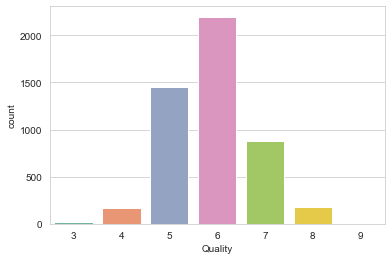

In [388]:
sns.countplot(x='Quality',data=white_df, palette="Set2")

In [389]:
# Red Wines per Quality group
sns.set_style('whitegrid')
groups=white_df.groupby('Quality')
for j in range (3,10):
    num_group = len(groups.get_group(j))
    print(f'For White Wines there are {num_group} different wines in Quality {j} wine ')

For White Wines there are 20 different wines in Quality 3 wine 
For White Wines there are 163 different wines in Quality 4 wine 
For White Wines there are 1457 different wines in Quality 5 wine 
For White Wines there are 2198 different wines in Quality 6 wine 
For White Wines there are 880 different wines in Quality 7 wine 
For White Wines there are 175 different wines in Quality 8 wine 
For White Wines there are 5 different wines in Quality 9 wine 


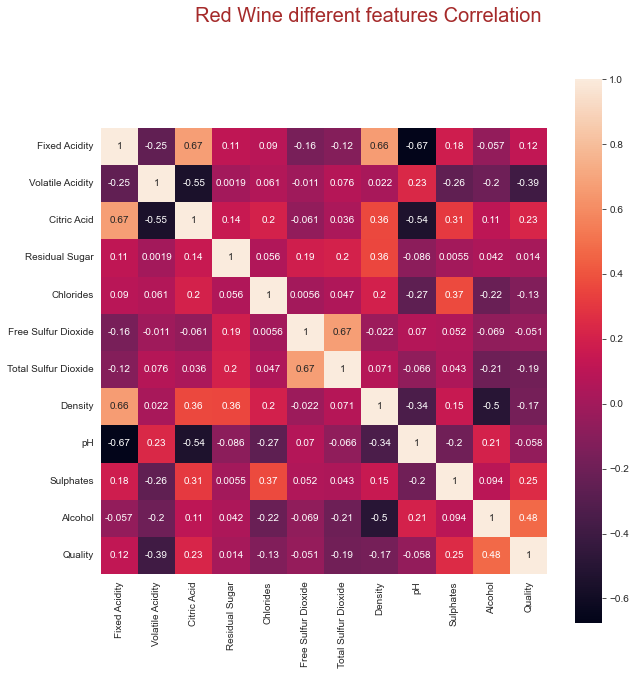

Red Wine Correlation of different features with quality:
Fixed Acidity : 0.1208
Volatile Acidity : -0.3906
Citric Acid : 0.2264
Residual Sugar : 0.0137
Chlorides : -0.1289
Free Sulfur Dioxide : -0.0507
Total Sulfur Dioxide : -0.1851
Density : -0.1749
pH : -0.0577
Sulphates : 0.2514
Alcohol : 0.4762
Quality : 1.0000


In [390]:
#Check Corrolation for Red Wine
plt.figure(figsize=(10, 10))
plt.suptitle('Red Wine different features Correlation ',fontsize=20, color="Brown")
sns.heatmap(red_df.corr(method='pearson'), annot=True, square=True)
plt.show()
 
print('Red Wine Correlation of different features with quality:')
for i in red_df.columns:
  corr, _ = pearsonr(red_df[i], red_df['Quality'])
  print('%s : %.4f' %(i,corr))

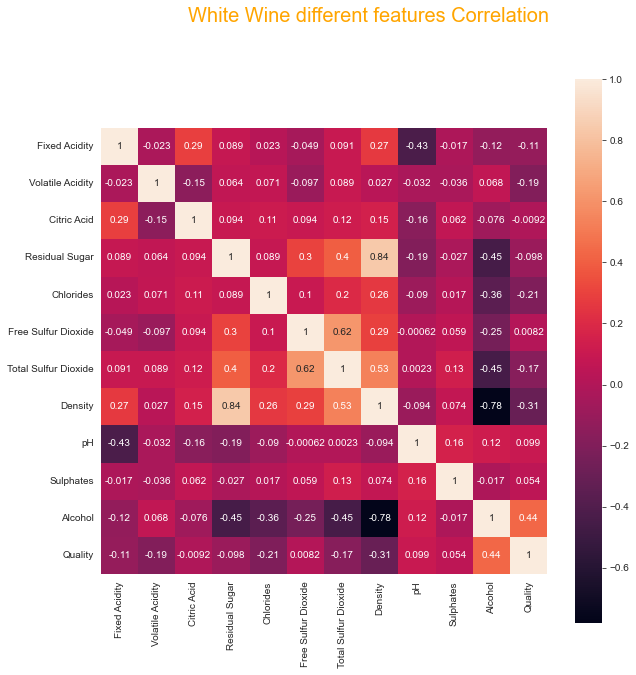

White Wine Correlation of different features with quality:
Fixed Acidity : -0.1137
Volatile Acidity : -0.1947
Citric Acid : -0.0092
Residual Sugar : -0.0976
Chlorides : -0.2099
Free Sulfur Dioxide : 0.0082
Total Sulfur Dioxide : -0.1747
Density : -0.3071
pH : 0.0994
Sulphates : 0.0537
Alcohol : 0.4356
Quality : 1.0000


In [391]:
#Check corrolation for White Wine
plt.figure(figsize=(10, 10))
plt.suptitle('White Wine different features Correlation ',fontsize=20, color="Orange")
sns.heatmap(white_df.corr(method='pearson'), annot=True, square=True)
plt.show()
 
print('White Wine Correlation of different features with quality:')
for i in white_df.columns:
  corr, _ = pearsonr(white_df[i], white_df['Quality'])
  print('%s : %.4f' %(i,corr))

C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/408478086.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1= red_df.select_dtypes([np.int,np.float])
C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/408478086.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/de

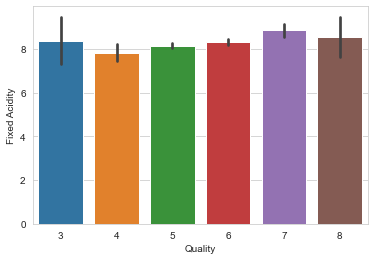

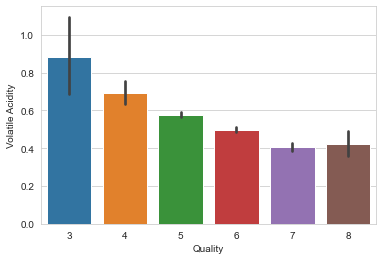

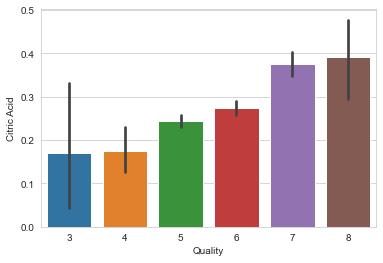

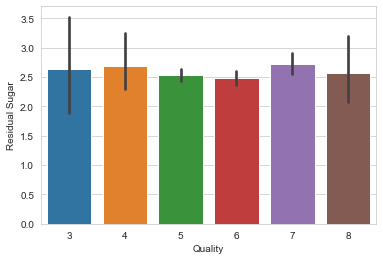

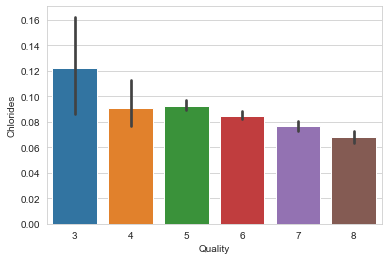

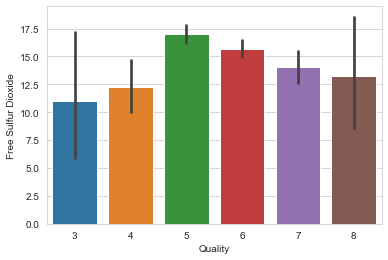

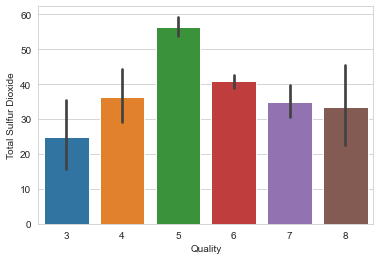

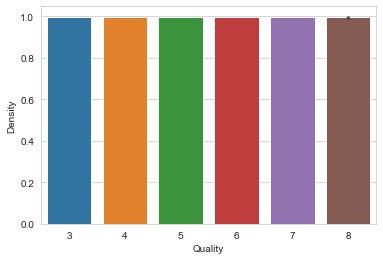

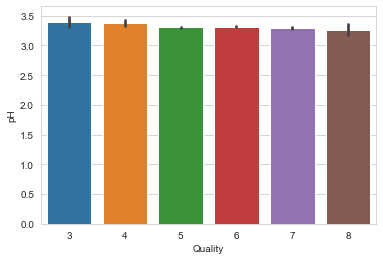

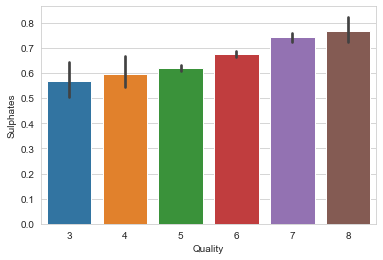

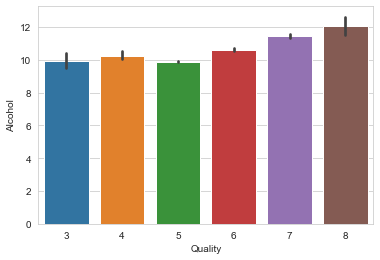

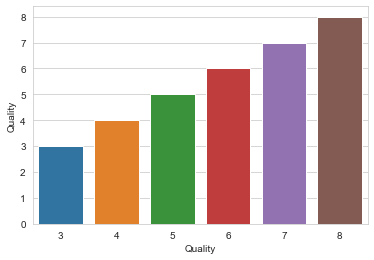

In [392]:
#For Red Wine Quality vs features
df1= red_df.select_dtypes([np.int,np.float])

for i,col in enumerate (df1.columns):
    plt.figure(i)
    sns.barplot(x='Quality',y=col,data=df1)

C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/444874812.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df2= red_df.select_dtypes([np.int,np.float])
C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/444874812.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/de

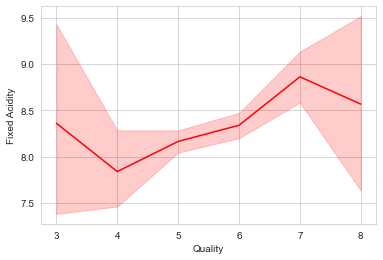

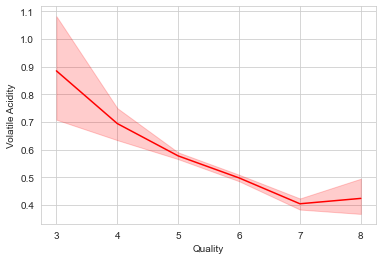

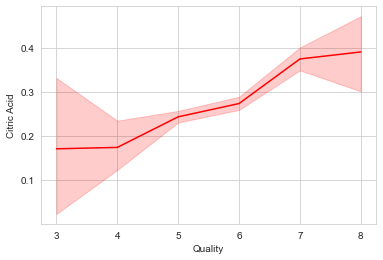

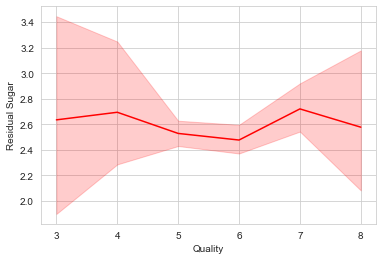

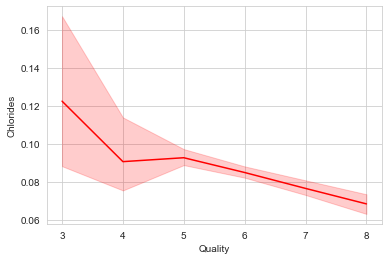

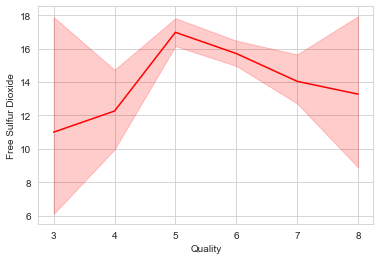

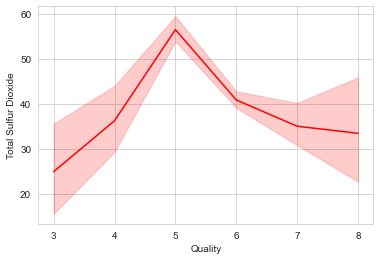

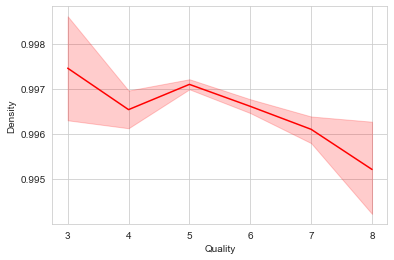

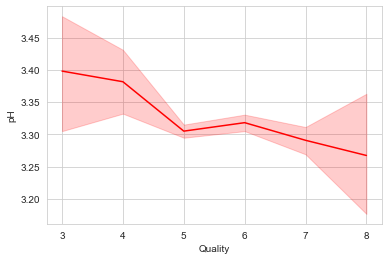

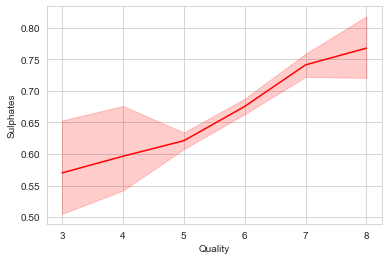

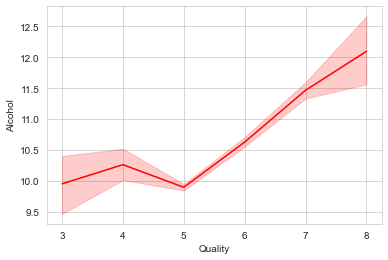

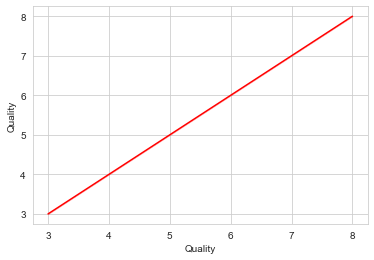

In [393]:
df2= red_df.select_dtypes([np.int,np.float])

for i,col in enumerate (df2.columns):
    plt.figure(i)
    sns.lineplot(x='Quality',y=col,data=df2,color = 'red')

C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/1006541392.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df3= white_df.select_dtypes([np.int,np.float])
C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/1006541392.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.or

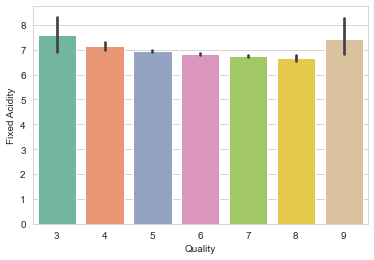

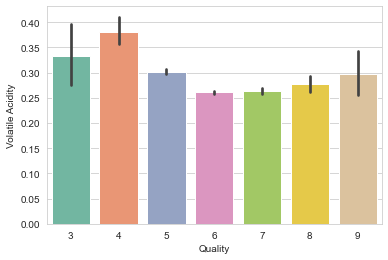

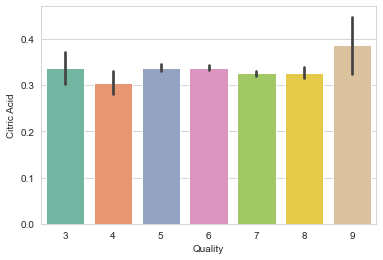

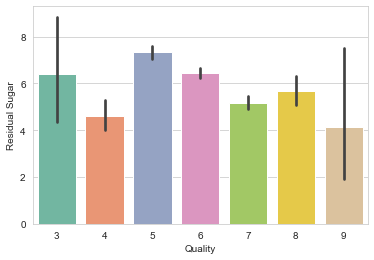

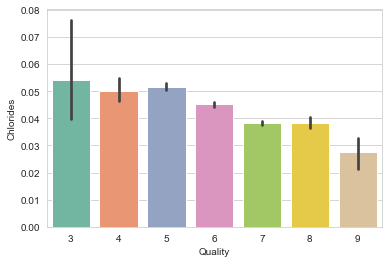

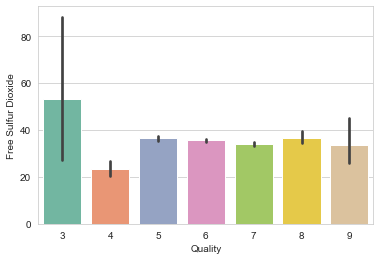

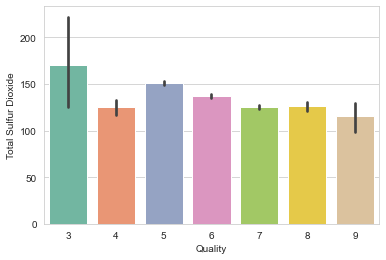

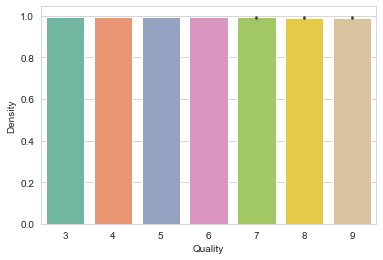

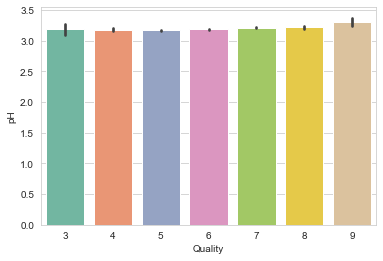

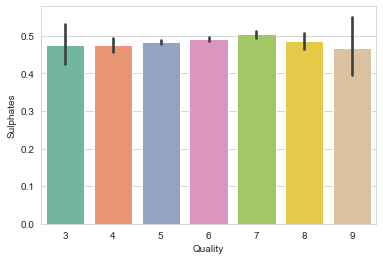

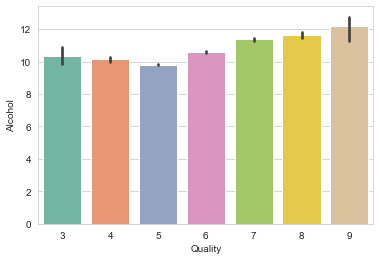

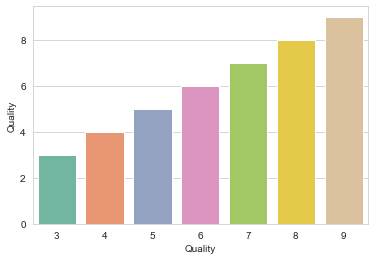

In [394]:
#For White Wine Quality vs features
df3= white_df.select_dtypes([np.int,np.float])

for i,col in enumerate (df3.columns):
    plt.figure(i)
    sns.barplot(x='Quality',y=col,data=df3,palette="Set2")

C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/1852485910.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df4= white_df.select_dtypes([np.int,np.float])
C:\Users\Gohar\AppData\Local\Temp/ipykernel_22700/1852485910.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.or

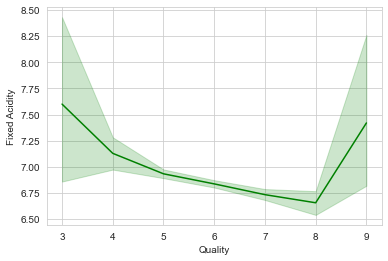

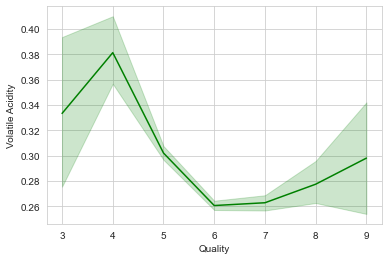

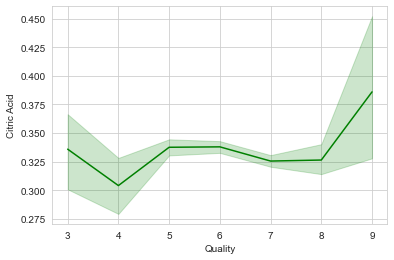

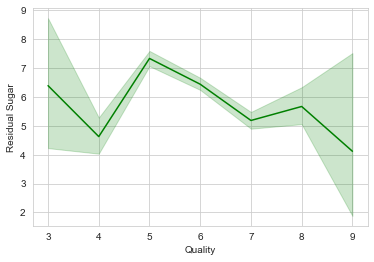

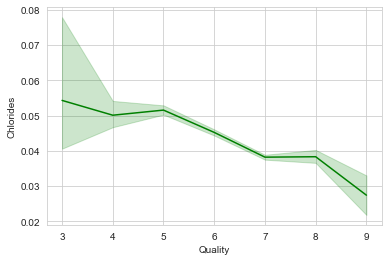

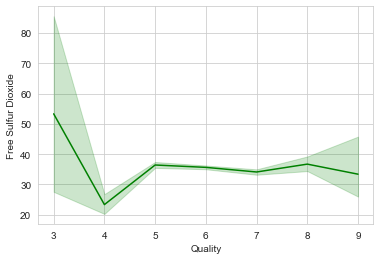

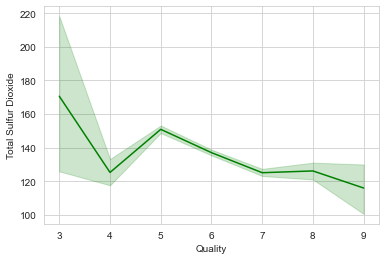

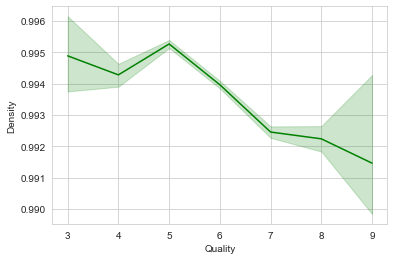

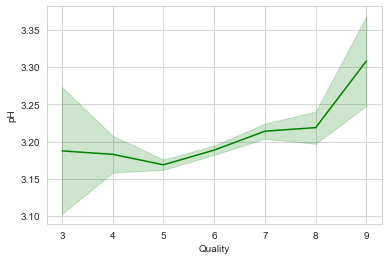

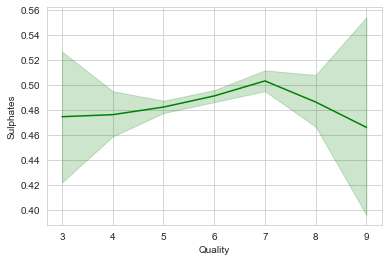

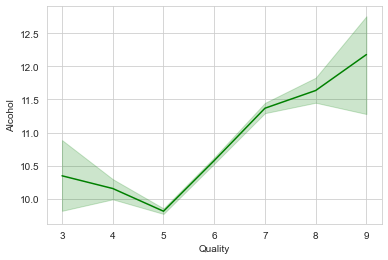

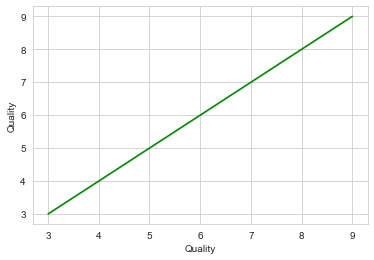

In [395]:
df4= white_df.select_dtypes([np.int,np.float])

for i,col in enumerate (df4.columns):
    plt.figure(i)
    sns.lineplot(x='Quality',y=col,data=df4,color = 'green')

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

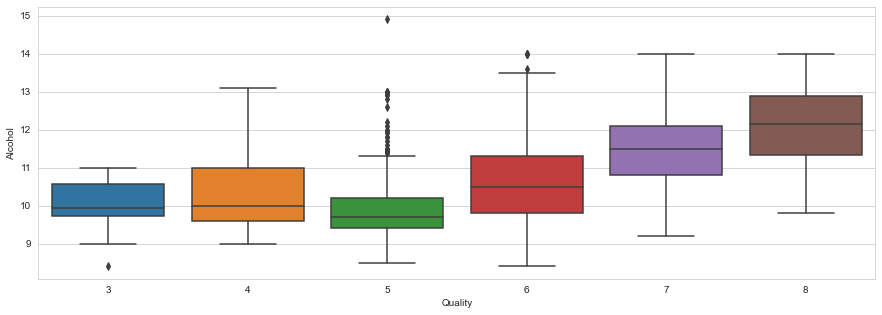

In [396]:
#Red Wine Alcohol
plt.figure(figsize=(15,5))
sns.boxplot(x="Quality",y= "Alcohol",data=red_df)

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

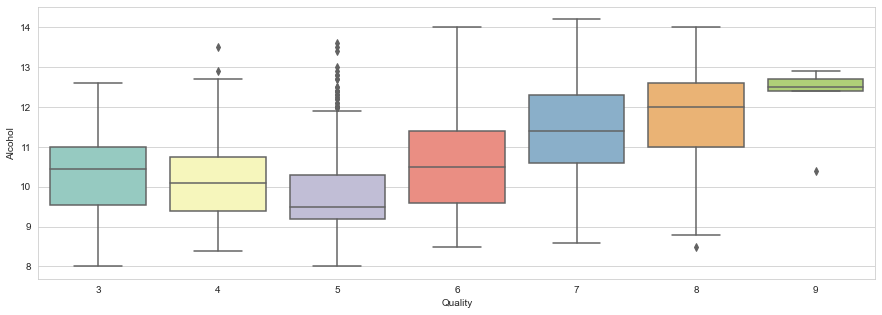

In [397]:
#White Wine Alcohol
plt.figure(figsize=(15,5))
sns.boxplot(x="Quality",y= "Alcohol",data=white_df,palette="Set3")

In [398]:
#For Red Wine
# Is the Red Wine acceptable? 1 = True, 0 = False

red_df['Score'] = red_df['Quality'].map( { 0:0,\
                                    1:0,\
                                    2:0,\
                                    3:0,\
                                    4:0,\
                                    5:0,\
                                    6:0,\
                                    7:1,\
                                    8:1,\
                                    9:1,\
                                    10:1 \
                                } )

In [399]:
#For Red Wine change data into correct form

df_mod = red_df.drop(['Quality', 'Score'], axis=1)
X = df_mod.values
y = red_df['Score'].to_numpy()

print(f"Red Wine X: {len(X[1])} features x {len(X)} entires")
print(f"Red Wine y: {len(y)} data entries")

Red Wine X: 11 features x 1599 entires
Red Wine y: 1599 data entries


In [400]:
red_df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.4,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.4,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,7.4,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [401]:
# Split Red Wine data into test and trial sets with 70-30 split
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

print(f"Red Wine training: {len(X_train)}, Red Wine testing: {len(X_test)}")

Red Wine training: 1119, Red Wine testing: 480


In [402]:
#For White Wine
# Is the White Wine acceptable? 1 = True, 0 = False

white_df['Score1'] = white_df['Quality'].map( { 0:0,\
                                    1:0,\
                                    2:0,\
                                    3:0,\
                                    4:0,\
                                    5:0,\
                                    6:0,\
                                    7:1,\
                                    8:1,\
                                    9:1,\
                                    10:1 \
                                } )

In [403]:
#For White Wine change data into correct form

df_mod1 = white_df.drop(['Quality', 'Score1'], axis=1)
X1 = df_mod1.values
y1 = white_df['Score1'].to_numpy()

print(f"White Wine X: {len(X1[1])} features x {len(X1)} entires")
print(f"White Wine y: {len(y1)} data entries")

White Wine X: 11 features x 4898 entires
White Wine y: 4898 data entries


In [404]:
white_df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Score1
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [405]:
# Split White Wine data into test and trial sets with 70-30 split
from sklearn.model_selection import train_test_split
(X_train1, X_test1, y_train1, y_test1) = train_test_split(X1, y1, test_size=0.3, shuffle=True, random_state=0)

print(f"White Wine training: {len(X_train1)}, White Wine testing: {len(X_test1)}")

White Wine training: 3428, White Wine testing: 1470


In [406]:
# Scale Red Wine data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [407]:
# Scale White Wine data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [408]:
#Ridge Regression for Red Wine
rmses_train =[]
rmses_test = []
lambdas = np.logspace(-4,3,100)

for l in lambdas:
    model = Ridge(normalize=True)
    model.set_params(alpha=l)
    model.fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    rmse_train = np.sqrt(np.mean((y_train - preds_train)**2))
    
    preds_test = model.predict(X_test)
    rmse_test = np.sqrt(np.mean((y_test - preds_test)**2)) 
    
    rmses_train.append(rmse_train)
    rmses_test.append(rmse_test)


(4.466835921509635e-05,
 2238.72113856834,
 0.27969763974392103,
 0.3100447296384591)

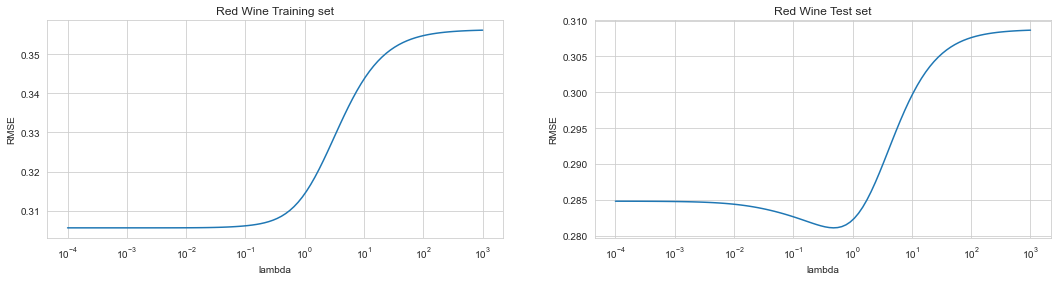

In [409]:
#For Red Wine Draw the train and test RMSE for different values of the regularization hyperparameter.
plt.figure(figsize=(18, 4))

plt.subplot(121)
ax = plt.gca()
ax.plot(lambdas, rmses_train)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Red Wine Training set")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(lambdas, rmses_test)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Red Wine Test set")
plt.axis("tight")

In [410]:
#Ridge Regression for White Wine
rmses_train1 =[]
rmses_test1 = []
lambdas = np.logspace(-4,3,100)

for l in lambdas:
    model1 = Ridge(normalize=True)
    model1.set_params(alpha=l)
    model1.fit(X_train1, y_train1)
    
    preds_train1 = model1.predict(X_train1)
    rmse_train1 = np.sqrt(np.mean((y_train1 - preds_train1)**2))
    
    preds_test1 = model1.predict(X_test1)
    rmse_test1 = np.sqrt(np.mean((y_test1 - preds_test1)**2)) 
    
    rmses_train1.append(rmse_train1)
    rmses_test1.append(rmse_test1)


(4.466835921509635e-05,
 2238.72113856834,
 0.3740823653048619,
 0.4109507418898767)

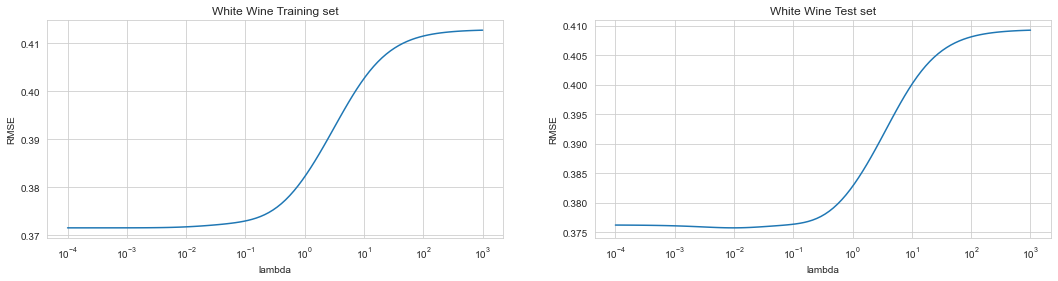

In [411]:
plt.figure(figsize=(18, 4))

plt.subplot(121)
ax = plt.gca()
ax.plot(lambdas, rmses_train1)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("White Wine Training set")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(lambdas, rmses_test1)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("White Wine Test set")
plt.axis("tight")

In [412]:
# Red Wine Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver ='lbfgs' )
lr.fit(X_test, y_test) 
percent = round(100* lr.score(X_test,y_test), 2)
print(f"Red Wine Logisitic Regression accuracy: {percent}%") 


Red Wine Logisitic Regression accuracy: 90.21%


In [413]:
# White Wine Logistic Regression
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver ='lbfgs' )
lr1.fit(X_test1, y_test1) 
percent1 = round(100* lr1.score(X_test1,y_test1), 2)
print(f"White Wine Logisitic Regression accuracy: {percent1}%") 

White Wine Logisitic Regression accuracy: 80.2%


In [414]:
# For Red Wine fitting the data for the KNN=3 test
knn = KNeighborsClassifier (n_neighbors = 3)
knn.fit (X_train, y_train)
pred_knn =knn.predict(X_test)
percent = round(100* knn.score( X_test , y_test ), 2)
print(f"For Red Wine k = 3, percent accuracy {percent}%")
print(classification_report(y_test,pred_knn))

For Red Wine k = 3, percent accuracy 88.54%
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       430
           1       0.46      0.56      0.50        50

    accuracy                           0.89       480
   macro avg       0.70      0.74      0.72       480
weighted avg       0.90      0.89      0.89       480



In [415]:
#For Red Wine KNN, RMSE for k=3
Red_model = KNeighborsClassifier (n_neighbors = 3)
Red_model.fit (X_train, y_train)
Red_preds_train = Red_model.predict(X_train)
Red_rmse_train = np.sqrt(np.mean((y_train -Red_preds_train)**2))

Red_preds_test = Red_model.predict(Xr_test)
Red_rmse_test = np.sqrt(np.mean((yr_test -Red_preds_test)**2))

print("Red Wine Train RMSE of the linear regression model is: ", Red_rmse_train)
print("Red Wine Test RMSE of the linear regression model is: ", Red_rmse_test)

Red Wine Train RMSE of the linear regression model is:  0.2623193450446023
Red Wine Test RMSE of the linear regression model is:  0.31622776601683794


In [343]:
# For Red Wine Create kNN classifier and see what value of k is the best
from sklearn.neighbors import KNeighborsClassifier
max = 0
rng = [1, 2, 3, 4, 5]
for i in ( rng ) :
    knni = KNeighborsClassifier (n_neighbors = i)
    # fitting the data
    knni.fit (X_train, y_train)
    percent2 =round(100* knni.score( X_train , y_train ), 2)
    print (f"For Red Wine nearest neighbor {i}, quality: {percent2}%")
    if (percent > max ) :
        max = percent2
        index = i
print(f"For Red Wine kNN with {index} nearest neighbor percent accuracy: {max}%")

For Red Wine nearest neighbor 1, quality: 100.0%
For Red Wine nearest neighbor 2, quality: 93.66%
For Red Wine nearest neighbor 3, quality: 93.12%
For Red Wine nearest neighbor 4, quality: 90.17%
For Red Wine nearest neighbor 5, quality: 89.81%
For Red Wine kNN with 1 nearest neighbor percent accuracy: 100.0%


In [416]:
# For White Wine fitting the data for the KNN=3 test
knn1 = KNeighborsClassifier (n_neighbors = 3)
knn1.fit (X_train1, y_train1)
pred_knn1 =knn1.predict(X_test1)
percent11 = round(100* knn1.score( X_test1 , y_test1), 2)
print(f"For White Wine k = 3, percent accuracy {percent11}%")
print(classification_report(y_test1,pred_knn1))

For White Wine k = 3, percent accuracy 82.38%
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1157
           1       0.60      0.51      0.55       313

    accuracy                           0.82      1470
   macro avg       0.74      0.71      0.72      1470
weighted avg       0.82      0.82      0.82      1470



In [417]:
# For White Wine Create kNN classifier and see what value of k is the best
from sklearn.neighbors import KNeighborsClassifier
max = 0
rng1 = [1, 2, 3, 4, 5]
for i in ( rng1 ) :
    knni1 = KNeighborsClassifier (n_neighbors = i)
    # fitting the data
    knni1.fit (X_train1, y_train1)
    percent3 =round(100* knni1.score( X_train1 , y_train1 ), 2)
    print (f"For White Wine nearest neighbor {i}, quality: {percent3}%")
    if (percent3 > max ) :
        max = percent3
        index = i
print(f"For White Wine kNN with {index} nearest neighbor percent accuracy: {max}%")

For White Wine nearest neighbor 1, quality: 100.0%
For White Wine nearest neighbor 2, quality: 92.56%
For White Wine nearest neighbor 3, quality: 91.39%
For White Wine nearest neighbor 4, quality: 89.61%
For White Wine nearest neighbor 5, quality: 88.89%
For White Wine kNN with 1 nearest neighbor percent accuracy: 100.0%


In [418]:
#For White Wine KNN, RMSE for k=3
White_model = KNeighborsClassifier (n_neighbors = 3)
White_model.fit (X_train1, y_train1)
White_preds_train = White_model.predict(X_train1)
White_rmse_train = np.sqrt(np.mean((y_train1 -White_preds_train)**2))

White_preds_test = White_model.predict(Xw_test)
White_rmse_test = np.sqrt(np.mean((yw_test -White_preds_test)**2))

print("White Wine Train RMSE of the linear regression model is: ", White_rmse_train)
print("White Wine Test RMSE of the linear regression model is: ", White_rmse_test)

White Wine Train RMSE of the linear regression model is:  0.29335304555243524
White Wine Test RMSE of the linear regression model is:  0.43799170619302547


In [419]:
#Split Red Wine into train-validation-test datasets by 70%-15%-15%
Xr_val, Xr_test, yr_val, yr_test = train_test_split(
    X_test,
    y_test, 
    train_size=0.5, 
    shuffle=True,
    random_state=0                                                                                                               
)

print("shape of X_train is: ", X_train.shape)
print("shape of Xr_val is: ", Xr_val.shape)
print("shape of Xr_test is: ", Xr_test.shape)

shape of X_train is:  (1119, 11)
shape of Xr_val is:  (240, 11)
shape of Xr_test is:  (240, 11)


In [420]:
#Split White Wine into train-validation-test datasets by 70%-15%-15%
Xw_val, Xw_test, yw_val, yw_test = train_test_split(
    X_test1,
    y_test1, 
    train_size=0.5, 
    shuffle=True,
    random_state=0                                                                                                               
)

print("shape of X_train1 is: ", X_train1.shape)
print("shape of Xw_val is: ", Xw_val.shape)
print("shape of Xw_test is: ", Xw_test.shape)

shape of X_train1 is:  (3428, 11)
shape of Xw_val is:  (735, 11)
shape of Xw_test is:  (735, 11)


In [421]:
#Training and Predicting
#Logistic Regression for Red Wine
model_lr=LogisticRegression(
     solver='liblinear',
     penalty= 'l2',
     C=0.5)

model_lr.fit(X_train,y_train)

preds_train = model_lr.predict(X_train)
preds_val = model_lr.predict(Xr_val)
print("For Red Wine first four 0-1 predictions for the validation set:")
print(preds_val[0:4])

probs_train = model_lr.predict_proba(Xr_test)[:, 1]
probs_val = model_lr.predict_proba(Xr_val)[:, 1]
print("For Red Wine first four predicted probabilities for positive label in the validation set:")
print(probs_val[0:4])

percent= round(100*model_lr.score(Xr_test,yr_test),2)
print(f"For Red Wine Logistic Reression accuracy:{percent}%")

For Red Wine first four 0-1 predictions for the validation set:
[0 0 0 0]
For Red Wine first four predicted probabilities for positive label in the validation set:
[0.03320907 0.37504025 0.21119591 0.0115025 ]
For Red Wine Logistic Reression accuracy:92.5%


In [422]:
#Logistic Regression for White Wine
model_lr1=LogisticRegression(
     solver='liblinear',
     penalty= 'l2',
     C=0.5)

model_lr1.fit(X_train1,y_train1)

preds_train1 = model_lr1.predict(X_train1)
preds_val1 = model_lr1.predict(Xw_val)
print("For White Wine first four 0-1 predictions for the validation set:")
print(preds_val[0:4])

probs_train1 = model_lr1.predict_proba(Xw_test)[:, 1]
probs_val1 = model_lr1.predict_proba(Xw_val)[:, 1]
print("For White Wine first four predicted probabilities for positive label in the validation set:")
print(probs_val1[0:4])

percent10= round(100*model_lr1.score(Xw_test,yw_test),2)

print(f"For White Wine Logistic Reression accuracy for White Wine:{percent10}%")

For White Wine first four 0-1 predictions for the validation set:
[0 0 0 0]
For White Wine first four predicted probabilities for positive label in the validation set:
[0.36142962 0.58451514 0.09761169 0.24007144]
For White Wine Logistic Reression accuracy for White Wine:78.23%


In [423]:
#Decision Tree for Red Wine


model_dt = tree.DecisionTreeClassifier(
    criterion="entropy",
    min_samples_split=100,
    max_leaf_nodes=3,
    random_state=0
)
model_dt.fit(X_train,y_train)

preds_train = model_dt.predict(X_train)
preds_val = model_dt.predict(Xr_val)
print("For Red Wine first four 0-1 predictions for the validation set:")
print(preds_val[0:4])

probs_train = model_dt.predict_proba(X_train)[:, 1]
probs_val = model_dt.predict_proba(Xr_val)[:, 1]
print("For Red Wine first four predicted probabilities for positive label in the validation set:")
print(probs_val[0:4])

For Red Wine first four 0-1 predictions for the validation set:
[0 1 0 0]
For Red Wine first four predicted probabilities for positive label in the validation set:
[0.0374415  0.50243902 0.14652015 0.0374415 ]


In [424]:
#Decision Tree for White Wine


model_dt1 = tree.DecisionTreeClassifier(
    criterion="entropy",
    min_samples_split=100,
    max_leaf_nodes=3,
    random_state=0
)
model_dt1.fit(X_train1,y_train1)

preds_train1 = model_dt1.predict(X_train1)
preds_val1 = model_dt1.predict(Xw_val)
print("For White Wine first four 0-1 predictions for the validation set:")
print(preds_val1[0:4])

probs_train1 = model_dt1.predict_proba(X_train1)[:, 1]
probs_val1 = model_dt1.predict_proba(Xw_val)[:, 1]
print("For White Wine first four predicted probabilities for positive label in the validation set:")
print(probs_val1[0:4])

For White Wine first four 0-1 predictions for the validation set:
[0 0 0 0]
For White Wine first four predicted probabilities for positive label in the validation set:
[0.3954608  0.3954608  0.04189189 0.3954608 ]


In [425]:
#Decision Tree For Red Wine
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Ellipsis]

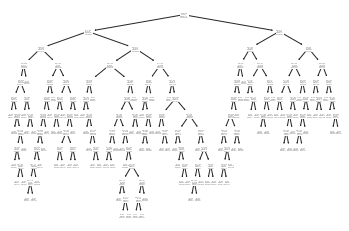

In [426]:
tree.plot_tree(clf)
[...]

In [427]:
#Decision Tree For White Wine
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train1, y_train1)

[Ellipsis]

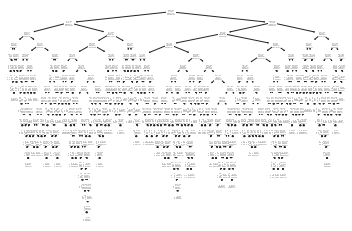

In [428]:
tree.plot_tree(clf1)
[...]

In [429]:
# extracting all model inputs from Red data set
all_inputs = red_df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density',
'pH', 'Sulphates', 'Alcohol']].values
# extracting quality labels
all_labels = red_df['Score'].values
# a test to see what the inputs look like
all_inputs[:2]

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ],
       [ 7.4   ,  0.88  ,  0.    ,  2.6   ,  0.098 , 25.    , 67.    ,
         0.9968,  3.2   ,  0.68  ,  9.8   ]])

In [431]:
# extracting all model inputs from White data set
all_inputs1 = white_df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density',
'pH', 'Sulphates', 'Alcohol']].values
# extracting quality labels
all_labels1 = white_df['Score1'].values
# a test to see what the inputs look like
all_inputs1[:2]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00]])

In [432]:
# Next we will apply standard scaling Red and White wines data
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
sc = StandardScaler()
all_inputs1 = sc.fit_transform(all_inputs1)

In [433]:
# Train_test split for Red and White wines Data , 70/30 split
#For Red Whine
(X_train,
X_test,
y_train,
y_test) = train_test_split(all_inputs, all_labels, test_size=0.3, random_state=1)

In [434]:
# For White Wine train_test split for White Data , 70/30 split
(X_train1,
X_tes1t,
y_train1,
y_test1) = train_test_split(all_inputs1, all_labels1, test_size=0.3, random_state=1)

In [435]:
#Dcision tree classfier 
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

In [436]:
# Train the classifier on the Red Wine training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
print ("Red Wine decision tree classifier score is:") 
decision_tree_classifier.score(X_test, y_test)

Red Wine decision tree classifier score is:


0.8854166666666666

In [437]:
# Train the classifier on the White wine training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
print ("White Wine decision tree classifier score is:") 
decision_tree_classifier.score(X_test, y_test)

White Wine decision tree classifier score is:


0.8770833333333333

In [446]:
#For Red Wine select the best models, based on the model names in an array
models=[LogisticRegression(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier()]
model_names=['Logistic Regression',
             'K-Nearest Neighbors',
             'Random Forest Classifier',
             'Decision Tree']


# creating an accuracy array and a matrix to join the accuracy of the models
acc=[]
m={}

# get the accuracy for each
for model in range(len(models)):
     clf=models[model]
     clf.fit(X_train,y_train)
     pred=clf.predict(X_test)
     acc.append(accuracy_score(pred,y_test))

m={'Algorithm':model_names,'Accuracy':acc}

print("Red Wine models selection based on the model names in an array")
# putt into a data frame and list out the results
acc_frame=pd.DataFrame(m)
acc_frame

Red Wine models selection based on the model names in an array


,Algorithm,Accuracy
0,Logistic Regression,0.877083
1,K-Nearest Neighbors,0.875000
2,Random Forest Classifier,0.910417
3,Decision Tree,0.887500


In [454]:
#For White Wine select the best models, based on the model names in an array
models1=[LogisticRegression(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier()]
model_names=['Logistic Regression',
             'K-Nearest Neighbors',
             'Random Forest Classifier',
             'Decision Tree']


# creating an accuracy array and a matrix to join the accuracy of the models
acc=[]
m={}

# get the accuracy for each
for model in range(len(models1)):
     clf=models1[model]
     clf.fit(X_train1,y_train1)
     pred1=clf.predict(X_test1)
     acc.append(accuracy_score(pred1,y_test1))

m={'Algorithm':model_names,'Accuracy':acc}

print("White Wine models selection based on the model names in an array")
# putt into a data frame and list out the results
acc_frame=pd.DataFrame(m)
acc_frame

White Wine models selection based on the model names in an array


,Algorithm,Accuracy
0,Logistic Regression,0.721088
1,K-Nearest Neighbors,0.681633
2,Random Forest Classifier,0.666667
3,Decision Tree,0.656463
